<class 'numpy.ndarray'>
(256, 256, 4) uint8


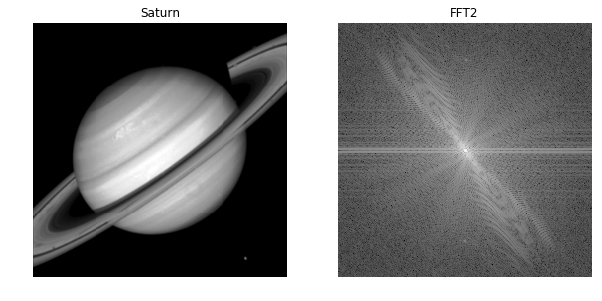

In [20]:
from scipy import fftpack, ndimage 
from skimage import color
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

img = plt.imread('images/saturn.png', 'uint8') # carrega a imagem

gray_im = color.rgb2gray(img) # converte para tons de cinza
fft2 = fftpack.fft2(gray_im) # utiliza função pronta para fft2
fft2_shifted = np.fft.fftshift(fft2)
fft2_scaled = 10*np.log10(abs(fft2_shifted)) # escala em dB para melhorar visualização


# configurações do print
print(type(img))
print(img.shape, img.dtype)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Saturn')
plt.axis('off')
plt.subplot(122)
plt.imshow(fft2_scaled, cmap=plt.cm.gray) 
plt.title('FFT2')
plt.axis('off')
plt.show()

In [27]:
# Primeiro as linhas, depois as colunas
xfft_im = np.apply_along_axis(lambda x: np.fft.fft(x), 0, gray_im) #FFT no eixo x da imagem
xfft_shifted = np.fft.fftshift(xfft_im)
xfft_scaled = 10*np.log10(abs(xfft_shifted))
xyfft_im = np.apply_along_axis(lambda y: np.fft.fft(y), 1, xfft_im) #FFT no eixo y da imagem
xyfft_shifted = np.fft.fftshift(xyfft_im)
xyfft_scaled = 10*np.log10(abs(xyfft_shifted))

# Primeiro as colunas, depois as linhas
yfft_im = np.apply_along_axis(lambda y: np.fft.fft(y), 1, gray_im) #FFT no eixo y da imagem
yfft_shifted = np.fft.fftshift(yfft_im)
yfft_scaled = 10*np.log10(abs(yfft_shifted))
yxfft_im = np.apply_along_axis(lambda x: np.fft.fft(x), 0, yfft_im) #FFT no eixo x da imagem
yxfft_shifted = np.fft.fftshift(yxfft_im)
yxfft_scaled = 10*np.log10(abs(yxfft_shifted))


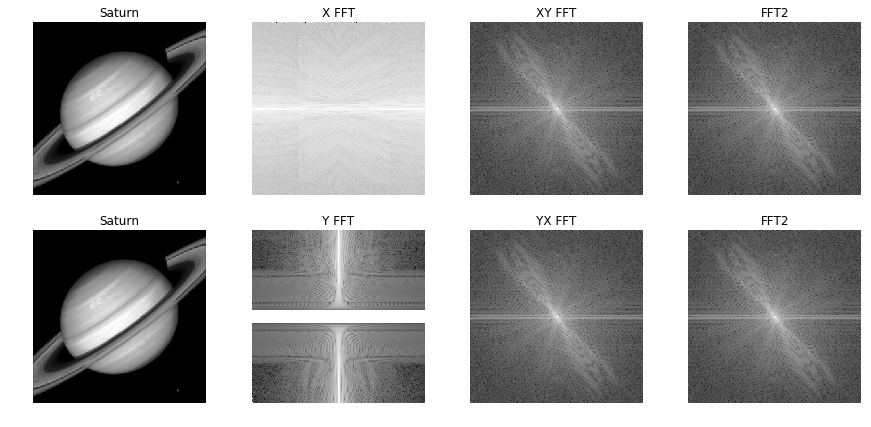

In [28]:
# configurações do plot
plt.figure(figsize=(15,7))
plt.subplot(241)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Saturn')
plt.axis('off')
plt.subplot(242)
plt.imshow(xfft_scaled, cmap=plt.cm.gray) 
plt.title('X FFT')
plt.axis('off')
plt.subplot(243)
plt.imshow(xyfft_scaled, cmap=plt.cm.gray) 
plt.title('XY FFT')
plt.axis('off')
plt.subplot(244)
plt.imshow(fft2_scaled, cmap=plt.cm.gray) 
plt.title('FFT2')
plt.axis('off')
plt.subplot(245)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Saturn')
plt.axis('off')
plt.subplot(246)
plt.imshow(yfft_scaled, cmap=plt.cm.gray) 
plt.title('Y FFT')
plt.axis('off')
plt.subplot(247)
plt.imshow(yxfft_scaled, cmap=plt.cm.gray) 
plt.title('YX FFT')
plt.axis('off')
plt.subplot(248)
plt.imshow(fft2_scaled, cmap=plt.cm.gray) 
plt.title('FFT2')
plt.axis('off')


plt.show()

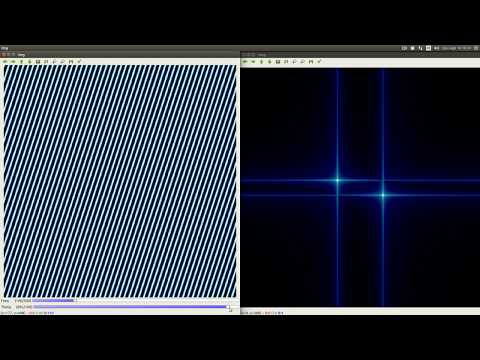

In [29]:
from IPython.lib.display import YouTubeVideo

YouTubeVideo('uD2BerBmnUs', width=600, height=400) # demonstração da fft2

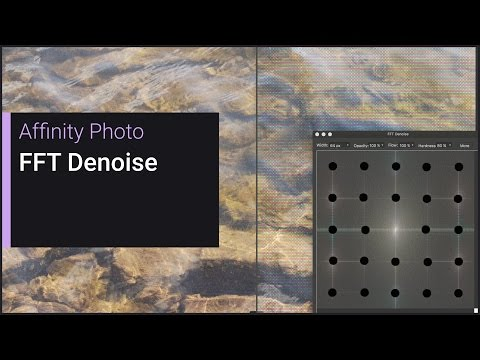

In [30]:
YouTubeVideo('6wfeMGwcF0c', width=600, height=400) # aplicação de FFT para remoção de ruído